In [1]:
import csv
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001)

In [2]:
replication = 10
method_list = ['MFE','CNN']
model_list = ['RF', 'FNN']
resize_list = [32, 64, 96, 128]

In [3]:
# dict init.
def result_init():
    d = {}
    metric_list = ['macro', 'micro','cm']
    for method in method_list:
        d[method] = {}
        if method == 'MFE':
            for model in model_list:
                d[method][model] = {}
                for metric in metric_list:
                    d[method][model][metric] = []
        if method == 'CNN':
            for model in resize_list:
                d[method][model] = {}
                for metric in metric_list:
                    d[method][model][metric] = []
    return d

In [4]:
def get_files(rep, method, model):
    filename = str(rep)+'_'+method+'_'+str(model)+'_f1'
    with open('./result/'+filename+'.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            macro = float(row[0])
            micro = float(row[1])
    filename = str(rep)+'_'+method+'_'+str(model)+'_cm'
    cm = []
    with open('./result/'+filename+'.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            row = [int(i) for i in row]
            cm.append(row)
    cm = np.array(cm)
    return macro, micro, cm

In [5]:
def result_sum(replication, method_list, model_list, cm_mode = False):
    d = result_init()
    
    for method in method_list:
        if method == 'MFE':
            for model in model_list:
                for rep in range(replication):
                    macro, micro, cm = get_files(rep, method, model)
                    d[method][model]['macro'].append(macro)
                    d[method][model]['micro'].append(micro)
                    if cm_mode is True:
                        d[method][model]['cm'].append(cm)
        if method == 'CNN':
            for model in resize_list:
                for rep in range(replication):
                    macro, micro, cm = get_files(rep, method, model)
                    d[method][model]['macro'].append(macro)
                    d[method][model]['micro'].append(micro)
                    if cm_mode is True:
                        d[method][model]['cm'].append(cm)
    return d

In [6]:
def summary(replication, method_list, model_list, cm_mode=False):
    d = result_sum(replication, method_list, model_list, cm_mode = cm_mode)
    summary_d = result_init()
    l = len(d['MFE']['RF']['micro'])
    for method in method_list:
        if method == 'MFE':
            for model in model_list:
                for metric in ['macro', 'micro']:
                    summary_d[method][model][metric] = np.mean(d[method][model][metric])
                if cm_mode is True:
                    cm = np.zeros([9,9])
                    for rep in range(l):
                        cm += d[method][model]['cm'][rep]
                    cm = np.divide(cm, l)
                    summary_d[method][model]['cm'] = cm
        if method == 'CNN':
            for model in resize_list:
                for metric in ['macro', 'micro']:
                    summary_d[method][model][metric] = np.mean(d[method][model][metric])
                if cm_mode is True:
                    cm = np.zeros([9,9])
                    for rep in range(l):
                        cm += d[method][model]['cm'][rep]
                    cm = np.divide(cm, l)
                    summary_d[method][model]['cm'] = cm
    return summary_d

In [7]:
def normalize_cm(cm):
    cm_normalize = []
    for row in range(len(cm)):
        cm_n = np.divide(cm[row],sum(cm[row]))
        cm_normalize.append(cm_n)
    return np.array(cm_normalize)

In [8]:
def plot_cm_normalize(cm, filename):
    cm_normalize = normalize_cm(cm)
    labels = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Local', 'Random', 'Scratch', 'Near-Full','None']
    ConfusionMatrixDisplay(cm_normalize, display_labels=labels).plot(cmap='Blues',
                                                                     values_format='0.2f',
                                                                     xticks_rotation=-35)
    plt.savefig(filename+'.png')


In [9]:
def plot_all(replication, method_list, model_list):
    summary_d = summary(replication, method_list, model_list, cm_mode=True)
    for method in method_list:
        if method == 'MFE':
            for model in model_list:
                cm = summary_d[method][model]['cm']
                filename = './result/cm/'+str(method)+'_'+str(model)+'_cm_.png'
                plot_cm_normalize(cm, filename)
        if method == 'CNN':
            for model in resize_list:
                cm = summary_d[method][model]['cm']
                filename = './result/cm/'+str(method)+'_'+str(model)+'_cm_.png'
                plot_cm_normalize(cm, filename)

In [11]:
summary(replication, method_list, model_list)

{'MFE': {'RF': {'macro': 0.8252793857761571,
   'micro': 0.9696300000000001,
   'cm': []},
  'FNN': {'macro': 0.7812973502492697, 'micro': 0.9635400000000001, 'cm': []}},
 'CNN': {32: {'macro': 0.8471873622690802,
   'micro': 0.9733499999999999,
   'cm': []},
  64: {'macro': 0.8667588491524427, 'micro': 0.97621, 'cm': []},
  96: {'macro': 0.8587325123396677, 'micro': 0.97563, 'cm': []},
  128: {'macro': 0.8617503987835381, 'micro': 0.97635, 'cm': []}}}

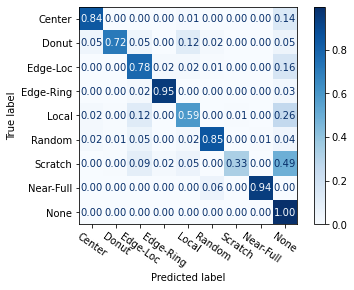

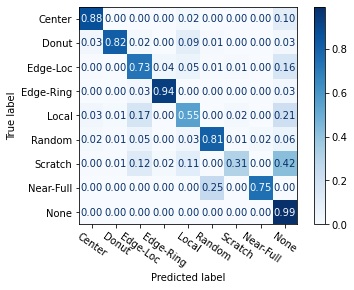

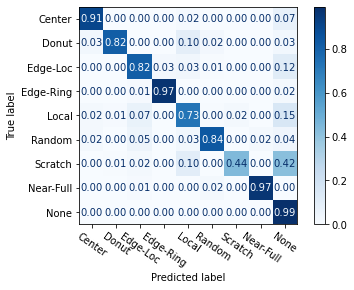

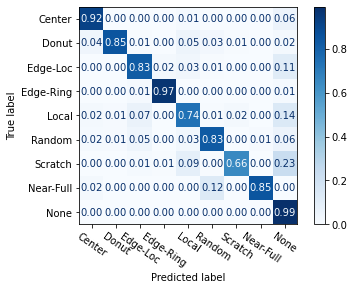

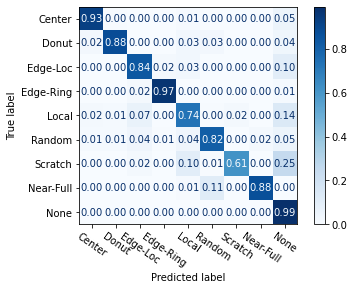

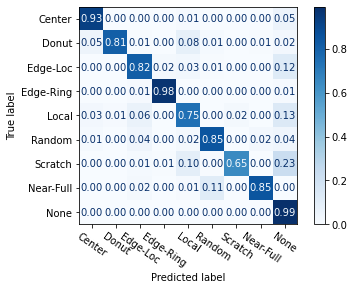

In [12]:
plot_all(replication, method_list, model_list)